# Decision tree regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import regression_tree

### Linear training set and test set

In [2]:
size = 1000

coefficients = [6.2,-1.4,2.1,-3,11,-8]
x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    x[:,i]=np.random.rand(size)
y = (x*coefficients).sum(axis=1) + np.random.normal(size=size)

t_x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    t_x[:,i]=np.random.rand(size)
t_y = (t_x*coefficients).sum(axis=1) + np.random.normal(size=size)

### Fitting the tree

In [3]:
tree = regression_tree.DecisionTreeRegressor()

In [4]:
tree.fit(x,y)

In [5]:
tree.score(x,y)

0.19138801366942948

In [6]:
tree.score(t_x,t_y)

2.8454327581115497

### Visualize results

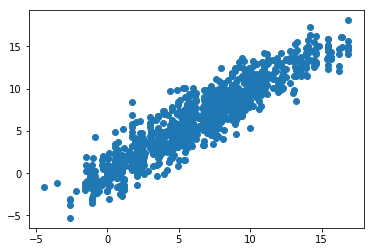

In [7]:
pred = tree.predict(t_x)
plt.scatter(pred,t_y)
plt.show()

**Note: regression tree options are the same as classification tree**

### Compare to linear regression

In [8]:
import linear_regressor

In [9]:
reg = linear_regressor.LinearRegressor()

In [10]:
reg.fit(x,y)
lpred = reg.predict(t_x)
reg.score(t_x,t_y)

1.012934379948356

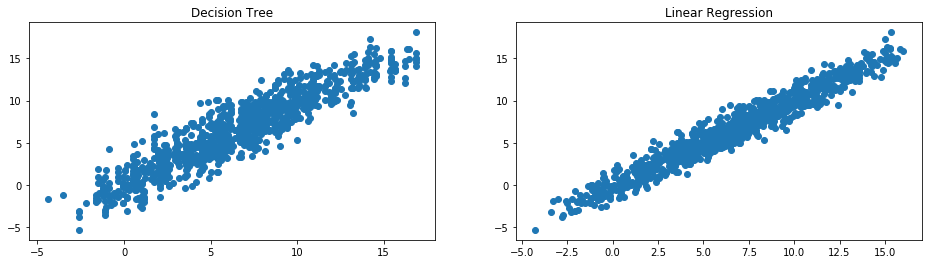

In [11]:
fig,axes = plt.subplots(ncols=2, figsize=(16,4))
axes[0].scatter(pred,t_y)
axes[0].set_title('Decision Tree')
axes[1].scatter(lpred,t_y)
axes[1].set_title('Linear Regression')
plt.show()

**LinearRegressor performs better on linear problems**

### Non-linear regression

In [12]:
coefficients = [-1.4,2.1,2,-4,5]
x = np.ones((size,len(coefficients)))
for i in range(0,len(coefficients)):
    x[:,i]=np.random.rand(size)*10
y = ((x[:,0]**2)*coefficients[0])
y += ((x[:,1]**3)*coefficients[1])
y += ((x[:,2]**4)*coefficients[2])
y += ((x[:,3]**5)*coefficients[3])
y += ((x[:,4]**6)*coefficients[4])
y += np.random.normal(size=size)

tx = np.ones((size,len(coefficients)))
for i in range(0,len(coefficients)):
    tx[:,i]=np.random.rand(size)*10
ty = ((tx[:,0]**2)*coefficients[0])
ty += ((tx[:,1]**3)*coefficients[1])
ty += ((tx[:,2]**4)*coefficients[2])
ty += ((tx[:,3]**5)*coefficients[3])
ty += ((tx[:,4]**6)*coefficients[4])
ty += np.random.normal(size=size)

In [13]:
import math 

tree.fit(x,y)
pred = tree.predict(tx)
math.log(tree.score(tx,ty))

21.5741966220447

In [14]:
reg.fit(x,y)
lpred = reg.predict(tx)
math.log(reg.score(tx,ty))

26.981887978293695

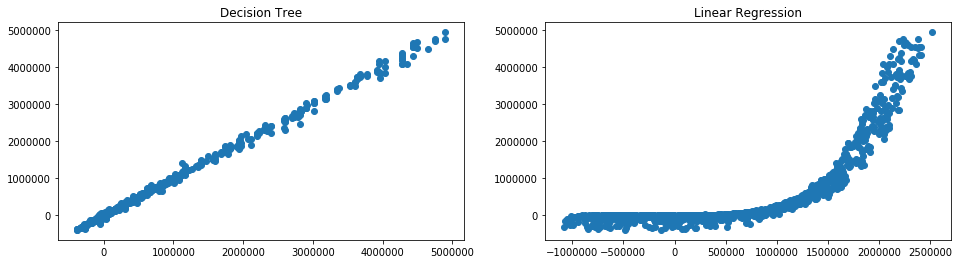

In [15]:
fig,axes = plt.subplots(ncols=2, figsize=(16,4))
axes[0].scatter(pred,ty)
axes[0].set_title('Decision Tree')
axes[1].scatter(lpred,ty)
axes[1].set_title('Linear Regression')
plt.show()

**Clearly, the decision tree performs much better on non-linear problems**